In [28]:
import pandas as pd
df1 = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")


# 将 'artist_name' 列名改为 'artist'
df1.rename(columns={'artists': 'artist_name'}, inplace=True)
# print(df.head())
print(df1.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artist_name       113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
from datetime import datetime

In [26]:
# 加载数据集
dataset_path = "spotify_tracks.csv"  # 替换为解压后文件的路径
df2 = pd.read_csv(dataset_path)

# 检查数据结构
print(f"Dataset shape: {df2.shape}")
print(df2.info())
print(df2.head())


Dataset shape: (62317, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechiness  

In [13]:
dataset_path3 = "audio_2019.csv"  # 替换为解压后文件的路径
df3 = pd.read_csv(dataset_path3)

# 检查数据结构
# print(f"Dataset shape: {df3.shape}")
print(df3.info())
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130662 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

In [42]:
import pandas as pd

# 假设三个数据框分别为 df1, df2, df3

# 统一需要保留的列名
common_columns = [
    'track_id',
    'artist_name',
    'track_name',
    'album_name',
    'popularity',
    'duration_ms',
    'acousticness',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'instrumentalness',
    'liveness',
    'tempo',
    'time_signature'
]

# 处理 df1
df1_cleaned = df1[common_columns]

# 处理 df2 (注意：df2缺少一些列，需要添加)
df2_columns = common_columns.copy()
df2_columns.remove('album_name')  # df2似乎没有这个列
df2_cleaned = df2[df2_columns]
df2_cleaned['album_name'] = None  # 添加缺失的列

# 处理 df3 (注意：df3缺少一些列，需要添加)
df3_columns = common_columns.copy()
df3_columns.remove('album_name')  # df3没有这个列
df3_cleaned = df3[df3_columns]
df3_cleaned['album_name'] = None

# 统一数据类型
# 将 duration_ms 转换为 int64
df1_cleaned['duration_ms'] = df1_cleaned['duration_ms'].astype('int64')
df2_cleaned['duration_ms'] = df2_cleaned['duration_ms'].astype('int64')
df3_cleaned['duration_ms'] = df3_cleaned['duration_ms'].astype('int64')

# 将 key 和 mode 转换为 int64
df1_cleaned['key'] = df1_cleaned['key'].astype('int64')
df2_cleaned['key'] = df2_cleaned['key'].astype('int64')
df3_cleaned['key'] = df3_cleaned['key'].astype('int64')

df1_cleaned['mode'] = df1_cleaned['mode'].astype('int64')
df2_cleaned['mode'] = df2_cleaned['mode'].astype('int64')
df3_cleaned['mode'] = df3_cleaned['mode'].astype('int64')

# 合并数据框
merged_df = pd.concat([df1_cleaned, df2_cleaned, df3_cleaned], axis=0, ignore_index=True)

# 删除重复行（如果有的话）
merged_df = merged_df.drop_duplicates(subset='track_id', keep='first')

# 基本信息统计
print("合并后的数据集信息：")
print(f"行数: {len(merged_df)}")
print(f"列数: {len(merged_df.columns)}")
print("\n列名:")
for col in merged_df.columns:
    print(col)

# 保存合并后的数据集
merged_df.to_csv('merged_music_dataset.csv', index=False)

2025-01-08 15:29:12,223 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2025-01-08 15:29:12,261 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2025-01-08 15:29:12,269 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2025-01-08 15:29:12,274 WARNING: S

In [41]:
import pandas as pd

def merge_music_datasets(df1, df2, df3):
    common_columns = [
        'track_id', 'artist_name', 'track_name', 'album_name', 
        'popularity', 'track_genre', 'duration_ms', 'acousticness',
        'danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'instrumentalness', 'liveness', 'tempo',
        'time_signature'
    ]
    
    # 处理每个数据框
    def process_df(df):
        # 添加缺失列
        for col in common_columns:
            if col not in df.columns:
                df[col] = None
        
        df = df[common_columns]
        
        # 统一数据类型
        numeric_cols = {
            'int64': ['duration_ms', 'key', 'mode', 'time_signature', 'popularity'],
            'float64': ['acousticness', 'danceability', 'energy', 'instrumentalness',
                       'liveness', 'loudness', 'speechiness', 'tempo']
        }
        
        for dtype, cols in numeric_cols.items():
            for col in cols:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce').astype(dtype)
        
        return df
    
    # 处理并合并数据
    dfs_cleaned = [process_df(df) for df in [df1, df2, df3]]
    merged_df = pd.concat(dfs_cleaned, ignore_index=True)
    merged_df = merged_df.drop_duplicates(subset='track_id', keep='first')
    
    return merged_df

# 使用示例:
merged_df = merge_music_datasets(df1, df2, df3)
# merged_df.to_csv('merged_music_dataset.csv', index=False)

2025-01-08 15:28:25,524 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2025-01-08 15:28:25,532 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2025-01-08 15:28:25,535 WARNING: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

2025-01-08 15:28:25,538 WARNING: S

In [43]:
print(merged_df.isnull().sum())

track_id                 0
artist_name              1
track_name               2
album_name          189625
popularity               0
duration_ms              0
acousticness             0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
instrumentalness         0
liveness                 0
tempo                    0
time_signature           0
dtype: int64


In [5]:
feature_columns = [
    "danceability", "energy", "valence", "tempo",
    "acousticness", "loudness", "instrumentalness",
    "speechiness", "liveness"
]
metadata_columns = ["track_id", "track_name", "artist_name", "album_name", "track_genre"]

df = df[feature_columns + metadata_columns]
print("筛选后的数据集：\n", df.head())


筛选后的数据集：
    danceability  energy  valence    tempo  acousticness  loudness  \
0         0.676  0.4610    0.715   87.917        0.0322    -6.746   
1         0.420  0.1660    0.267   77.489        0.9240   -17.235   
2         0.438  0.3590    0.120   76.332        0.2100    -9.734   
3         0.266  0.0596    0.143  181.740        0.9050   -18.515   
4         0.618  0.4430    0.167  119.949        0.4690    -9.681   

   instrumentalness  speechiness  liveness                track_id  \
0          0.000001       0.1430    0.3580  5SuOikwiRyPMVoIQDJUgSV   
1          0.000006       0.0763    0.1010  4qPNDBW1i3p13qLCt0Ki3A   
2          0.000000       0.0557    0.1170  1iJBSr7s7jYXzM8EGcbK5b   
3          0.000071       0.0363    0.1320  6lfxq3CG4xtTiEg7opyCyx   
4          0.000000       0.0526    0.0829  5vjLSffimiIP26QG5WcN2K   

                   track_name                 artists  \
0                      Comedy             Gen Hoshino   
1            Ghost - Acoustic           

In [6]:
# 检查缺失值
print("缺失值统计：\n", df.isnull().sum())

# 删除缺失值
df.dropna(inplace=True)
print("删除缺失值后的数据集大小：", df.shape)


缺失值统计：
 danceability        0
energy              0
valence             0
tempo               0
acousticness        0
loudness            0
instrumentalness    0
speechiness         0
liveness            0
track_id            0
track_name          1
artists             1
album_name          1
track_genre         0
dtype: int64
删除缺失值后的数据集大小： (113999, 14)


In [54]:
def create_features(df):
    # 复制数据框以避免修改原始数据
    df_features = df.copy()
    
    # 1. 创建艺术家特征
    artist_features = df.groupby('artist_name').agg({
        'popularity': ['mean', 'std', 'count'],
        'acousticness': 'mean',
        'danceability': 'mean',
        'energy': 'mean'
    })
    
    artist_features.columns = [
        'artist_avg_popularity', 'artist_popularity_std', 
        'artist_track_count', 'artist_avg_acousticness',
        'artist_avg_danceability', 'artist_avg_energy'
    ]
    
    # 将艺术家特征映射回原始数据
    for col in artist_features.columns:
        df_features[col] = df_features['artist_name'].map(
            artist_features[col]
        )
    
    # 2. 标准化数值特征
    audio_features = [
        'acousticness', 'danceability', 'energy',
        'instrumentalness', 'liveness', 'tempo',
        'loudness', 'speechiness'
    ]
    
    scaler = StandardScaler()
    df_features[audio_features] = scaler.fit_transform(
        df_features[audio_features]
    )
    
    # 3. 归一化popularity
    df_features['popularity'] = df_features['popularity'] / 100.0
    
    # 4. 处理duration_ms
    df_features['duration_minutes'] = df_features['duration_ms'] / 60000
    
    # 保存scaler
    joblib.dump(scaler, 'audio_features_scaler.joblib')
    
    return df_features, scaler

# 创建特征
df_with_features, scaler = create_features(merged_df)

Basic Statistics:
          popularity   duration_ms  acousticness  danceability        energy  \
count  279365.000000  2.793650e+05  2.793650e+05  2.793650e+05  2.793650e+05   
mean        0.247846  2.244281e+05 -1.261537e-16 -2.620741e-16 -3.222641e-16   
std         0.205974  1.188849e+05  1.000002e+00  1.000002e+00  1.000002e+00   
min         0.000000  0.000000e+00 -3.980240e+00 -8.496423e+00 -6.187515e+00   
25%         0.050000  1.720080e+05 -9.193667e-01 -6.267612e-01 -6.723165e-01   
50%         0.220000  2.117000e+05 -3.704960e-01  1.214488e-01  1.377162e-01   
75%         0.400000  2.603330e+05  8.623885e-01  7.458542e-01  8.159732e-01   
max         1.000000  5.610020e+06  1.935235e+00  2.247657e+00  1.563994e+00   

                 key      loudness           mode   speechiness  \
count  279365.000000  2.793650e+05  279365.000000  2.793650e+05   
mean        5.220905  2.397174e-18       0.612772  2.859568e-16   
std         3.579076  1.000002e+00       0.487375  1.000002e

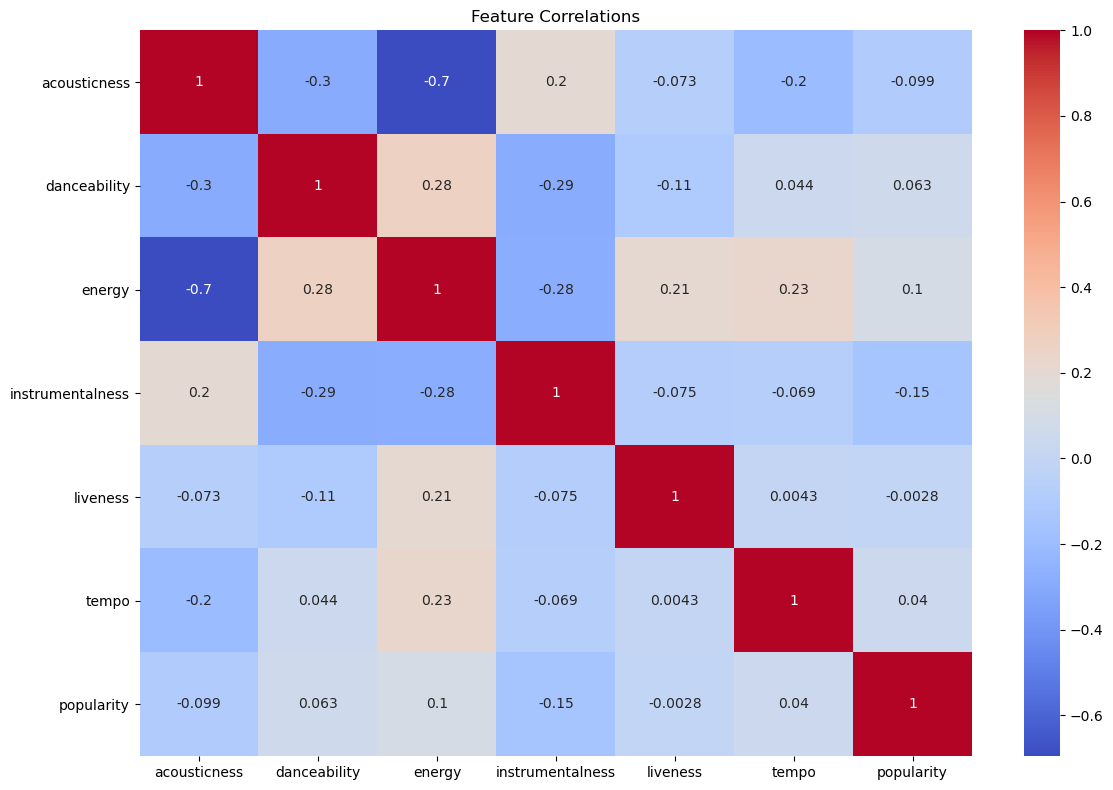

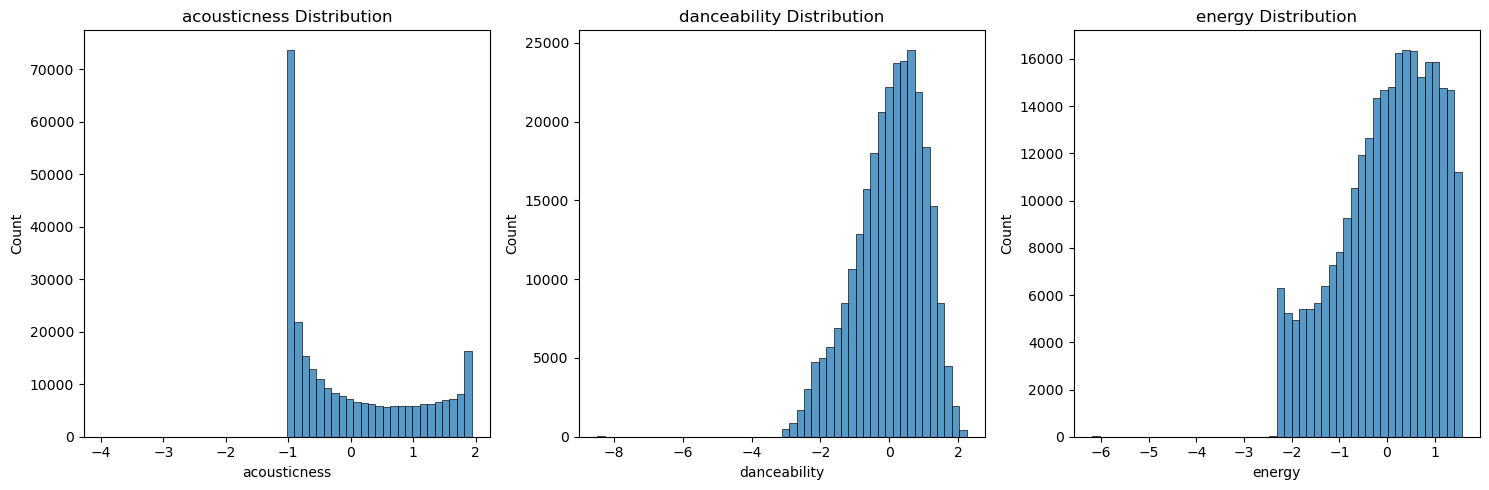

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns 
def analyze_features(df):
    # 1. 基本统计信息
    print("Basic Statistics:")
    print(df.describe())
    
    # 2. 相关性分析
    plt.figure(figsize=(12, 8))
    audio_features = [
        'acousticness', 'danceability', 'energy',
        'instrumentalness', 'liveness', 'tempo',
        'popularity'
    ]
    sns.heatmap(
        df[audio_features].corr(), 
        annot=True, 
        cmap='coolwarm'
    )
    plt.title('Feature Correlations')
    plt.tight_layout()
    plt.show()
    
    # 3. 特征分布
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(audio_features[:3], 1):
        plt.subplot(1, 3, i)
        sns.histplot(df[feature], bins=50)
        plt.title(f'{feature} Distribution')
    plt.tight_layout()
    plt.show()

# 分析特征
analyze_features(df_with_features)

In [48]:
import hopsworks
import os

In [59]:
os.environ["HOPSWORKS_API_KEY"] = "K86PR55oWoqOXhUX.VUJFWq1zEqfhZntoebWp1RLsH90VVbAYuqukvh5AcM8xHOYk7c4vg4VvD6iZEG37"
project = hopsworks.login()

2025-01-08 15:53:54,948 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-01-08 15:53:54,986 INFO: Initializing external client
2025-01-08 15:53:54,987 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-01-08 15:53:56,418 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1164445


In [64]:
feature_store = project.get_feature_store()
spotify_fg = feature_store.get_or_create_feature_group(
    name="spotify_features",
    description="Processed Spotify features for recommendation system",
    version=2,
    primary_key=["track_id"],  # 使用 track_id 作为主键
    event_time=None           # 不设置事件时间（可根据需求调整）
)
df_with_features['artist_name'] = df_with_features['artist_name'].fillna("unknown_artist")


In [67]:
# 列出所有包含 NaN 值的列及其对应的行数
missing_data_summary = df_with_features.isnull().sum()
print(missing_data_summary[missing_data_summary > 0])
# 填充 track_name
df_with_features['track_name'] = df_with_features['track_name'].fillna("unknown_track")

# 填充 album_name
df_with_features['album_name'] = df_with_features['album_name'].fillna("unknown_album")

# 填充艺术家统计特征
stats_columns = [
    'artist_avg_popularity', 'artist_popularity_std', 
    'artist_track_count', 'artist_avg_acousticness',
    'artist_avg_danceability', 'artist_avg_energy'
]
df_with_features[stats_columns] = df_with_features[stats_columns].fillna(0)

# 验证数据
print(df_with_features.isnull().sum())
assert df_with_features.notnull().all().all(), "Data still contains null values"



track_name                      2
album_name                 189625
artist_avg_popularity           1
artist_popularity_std       45608
artist_track_count              1
artist_avg_acousticness         1
artist_avg_danceability         1
artist_avg_energy               1
dtype: int64
track_id                   0
artist_name                0
track_name                 0
album_name                 0
popularity                 0
duration_ms                0
acousticness               0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
instrumentalness           0
liveness                   0
tempo                      0
time_signature             0
artist_avg_popularity      0
artist_popularity_std      0
artist_track_count         0
artist_avg_acousticness    0
artist_avg_danceability    0
artist_avg_energy          0
duration_minutes           0
dtype: int64


In [68]:
spotify_fg.insert(df_with_features)


%6|1736348490.641|FAIL|rdkafka#producer-3| [thrd:ssl://51.161.81.188:9093/bootstrap]: ssl://51.161.81.188:9093/1: Disconnected (after 102413ms in state UP)

















Uploading Dataframe: 100.00% |██████████| Rows 279365/279365 | Elapsed Time: 00:18 | Remaining Time: 00:00


Launching job: spotify_features_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1164445/jobs/named/spotify_features_2_offline_fg_materialization/executions


(Job('spotify_features_2_offline_fg_materialization', 'SPARK'), None)

%6|1736348515.161|FAIL|rdkafka#producer-1| [thrd:ssl://51.161.81.188:9093/bootstrap]: ssl://51.161.81.188:9093/1: Disconnected (after 49990ms in state UP, 1 identical error(s) suppressed)
%6|1736348515.179|FAIL|rdkafka#producer-1| [thrd:ssl://51.161.81.208:9093/bootstrap]: ssl://51.161.81.208:9093/2: Disconnected (after 50000ms in state UP, 1 identical error(s) suppressed)
%6|1736348541.199|FAIL|rdkafka#producer-3| [thrd:ssl://51.161.81.208:9093/bootstrap]: ssl://51.161.81.208:9093/2: Disconnected (after 50060ms in state UP, 1 identical error(s) suppressed)
%6|1736348541.257|FAIL|rdkafka#producer-3| [thrd:ssl://51.161.81.188:9093/bootstrap]: ssl://51.161.81.188:9093/1: Disconnected (after 49999ms in state UP, 1 identical error(s) suppressed)
%6|1736348565.747|FAIL|rdkafka#producer-1| [thrd:ssl://51.161.80.189:9093/bootstrap]: ssl://51.161.80.189:9093/0: Disconnected (after 50003ms in state UP, 1 identical error(s) suppressed)
%6|1736348591.876|FAIL|rdkafka#producer-3| [thrd:ssl://51.16

In [70]:
feature_descriptions = {
    "track_id": "Unique ID of the track, used as the primary key.",
    "artist_name": "Name of the artist associated with the track.",
    "track_name": "Name of the track. If unknown, replaced with 'unknown_track'.",
    "album_name": "Album where the track is included. If unknown, replaced with 'unknown_album'.",
    "popularity": "Normalized popularity of the track, scaled to a range of 0.0 to 1.0.",
    "duration_ms": "Duration of the track in milliseconds.",
    "duration_minutes": "Duration of the track, converted from milliseconds to minutes.",
    "acousticness": "Standardized acousticness of the track (normalized).",
    "danceability": "Standardized danceability of the track (normalized).",
    "energy": "Standardized energy level of the track (normalized).",
    "liveness": "Standardized liveness of the track, indicating presence of an audience (normalized).",
    "tempo": "Standardized tempo of the track, representing beats per minute (normalized).",
    "time_signature": "The time signature of the track, expressed as beats per bar.",
    "artist_avg_popularity": "Average popularity of the artist across all tracks, calculated from the dataset.",
    "artist_popularity_std": "Standard deviation of the artist's track popularity, representing popularity variability.",
    "artist_track_count": "Total number of tracks associated with the artist in the dataset.",
    "artist_avg_acousticness": "Average acousticness across all tracks by the artist.",
    "artist_avg_danceability": "Average danceability across all tracks by the artist.",
    "artist_avg_energy": "Average energy across all tracks by the artist."
}
# 使用循环更新字段描述
for feature, description in feature_descriptions.items():
    spotify_fg.update_feature_description(feature, description)

print("Spotify features successfully updated in Hopsworks Feature Store!")


Spotify features successfully updated in Hopsworks Feature Store!


%6|1736348783.258|FAIL|rdkafka#producer-3| [thrd:ssl://51.161.81.208:9093/bootstrap]: ssl://51.161.81.208:9093/2: Disconnected (after 49953ms in state UP, 1 identical error(s) suppressed)
%6|1736348817.648|FAIL|rdkafka#producer-1| [thrd:ssl://51.161.81.188:9093/bootstrap]: ssl://51.161.81.188:9093/1: Disconnected (after 49934ms in state UP, 1 identical error(s) suppressed)
%6|1736348834.631|FAIL|rdkafka#producer-3| [thrd:ssl://51.161.81.188:9093/bootstrap]: ssl://51.161.81.188:9093/1: Disconnected (after 50542ms in state UP, 1 identical error(s) suppressed)
%6|1736348867.771|FAIL|rdkafka#producer-1| [thrd:ssl://51.161.81.208:9093/bootstrap]: ssl://51.161.81.208:9093/2: Disconnected (after 99730ms in state UP, 1 identical error(s) suppressed)
%6|1736348884.768|FAIL|rdkafka#producer-3| [thrd:ssl://51.161.80.189:9093/bootstrap]: ssl://51.161.80.189:9093/0: Disconnected (after 99631ms in state UP, 1 identical error(s) suppressed)
%6|1736348918.315|FAIL|rdkafka#producer-1| [thrd:ssl://51.16

In [69]:
spotify_features = feature_store.get_feature_group(
    name='spotify_features',
    version=2,
)
df = spotify_features.read()
print(df.head())

%6|1736348642.406|FAIL|rdkafka#producer-3| [thrd:ssl://51.161.80.189:9093/bootstrap]: ssl://51.161.80.189:9093/0: Disconnected (after 50005ms in state UP, 1 identical error(s) suppressed)
%6|1736348642.532|FAIL|rdkafka#producer-3| [thrd:ssl://51.161.81.208:9093/bootstrap]: ssl://51.161.81.208:9093/2: Disconnected (after 50132ms in state UP, 1 identical error(s) suppressed)


%6|1736348666.505|FAIL|rdkafka#producer-1| [thrd:ssl://51.161.81.188:9093/bootstrap]: ssl://51.161.81.188:9093/1: Disconnected (after 50002ms in state UP, 1 identical error(s) suppressed)


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (31.86s) 
                 track_id            artist_name                 track_name  \
0  7u7Ej380LOk8NxY9YHvYU4            Dom Kennedy                Best Friend   
1  3PPeqAc0fCfFdh8cUYShn6              Lady Gaga  I Don't Know What Love Is   
2  21y41zLKNubjc0Crjd8bwK         Aire Atlantica      Things I Hate About U   
3  29I2hJAdFNSKbtXM1OmXm3                  MBNel                      Alone   
4  4XSd3gOBb577jSqJbkS0U9  Valentina Ponomaryova      А на последок я скажу   

            album_name  popularity  duration_ms  acousticness  danceability  \
0        unknown_album        0.44       171013     -0.115621      1.370260   
1        unknown_album        0.72       177293      0.014780     -0.847456   
2        unknown_album        0.29       205035     -0.097839      0.239871   
3        unknown_album        0.02       138177     -0.810897      0.756620   
4  Моей душе покоя нет        0.28       16

%6|1736348716.624|FAIL|rdkafka#producer-1| [thrd:ssl://51.161.80.189:9093/bootstrap]: ssl://51.161.80.189:9093/0: Disconnected (after 100294ms in state UP, 1 identical error(s) suppressed)
%6|1736348732.637|FAIL|rdkafka#producer-3| [thrd:ssl://51.161.81.188:9093/bootstrap]: ssl://51.161.81.188:9093/1: Disconnected (after 140103ms in state UP, 1 identical error(s) suppressed)
%6|1736348767.080|FAIL|rdkafka#producer-1| [thrd:ssl://51.161.81.208:9093/bootstrap]: ssl://51.161.81.208:9093/2: Disconnected (after 50000ms in state UP, 1 identical error(s) suppressed)
